# Python fo visualizing: HW 1
Dobrynina Anastasia, group 213

### Task
Take the Pearson's father-son data. To properly use linear regression between two variables one needs to ensure that both variables are distributed normally. This is what you are going to do in this assignment.

You will need a figure with multople subplots of different size: the top left one should be bigger than the others.

* On the top left plot simply scatterplot the data with x being fathers' heights and y being respective sons' heights.
* Now choose 3 (see note below) segments on the x axis and independently choose 3 segments on the y axis.
* Below the previous plot show the histogram of x values on the first x axis segment. Below it do the same thing for the second x axis segment. Below it do the same thing for the third x axis segment.
* To the right of the scatterplot do the vertical histogram of the y axis values within the first y axis segment. To the right of it do the same thing for the second y axis segment. To the right of it do the same thing for the third y axis segment.
* This part earns you 8 points

Provide figure with some title, use some other font than the default one used for axes. You get 1 point if you use pre-installed font or 2 points if you use some font from the web, remember to provide the link for me to download it.

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import font_manager

In [4]:
df = pd.read_csv('Pearson.tsv', delimiter = '\t')
df

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


let's check the minimum and maximum values of parameters

In [5]:
print('minimum sons:', df.Son.min(), ' maximum sons:', df.Son.max())
print('minimum dads:', df.Father.min(), ' maximum dads:', df.Father.max())

minimum sons: 58.5  maximum sons: 78.4
minimum dads: 59.0  maximum dads: 75.4


To divide the data to 3 representative parts we should make them approximately of the same weight

In [6]:
len(df[df['Son'] <= 67.5]['Father']), len(df[(df['Son'] > 67.5) &(df['Son'] <= 70)]['Father']), len(df[df['Son'] > 70]['Father'])

(363, 395, 320)

In [7]:
len(df[df['Father'] <= 66.5]['Son']), len(df[(df['Father'] > 66.5) &(df['Father'] <= 69)]['Son']), len(df[df['Father'] > 69]['Son'])

(373, 362, 343)

So, to make the parts balanced we should divide the son's and the father's data at different values

Let's make up the data for visualizing

In [8]:
#data
x1 = df[df['Son'] <= 67.5]['Father'] #fathers with sons lower than 67.5
x2 = df[(df['Son'] > 67.5) &(df['Son'] <= 70)]['Father'] #fathers with sons lower than 70 but higher than 67.5
x3 = df[df['Son'] > 70]['Father'] #fathers with sons higher than 70

y1 = df[df['Father'] <= 66.5]['Son'] #sons with father lower than 66.5
y2 = df[(df['Father'] > 66.5) &(df['Father'] <= 69)]['Son'] #sons with father lower than 69 but higher than 66.5
y3 = df[df['Father'] > 69]['Son'] #sons with father higher than 69

## Visualization 

Links to download the used fonts:
* [Caveat](https://fonts.google.com/specimen/Caveat)
* [Press Start 2P](https://fonts.google.com/specimen/Press+Start+2P)

In [13]:
path_Press = 'PressStart2P-Regular.ttf' # your path to .ttf file
path_Caveat = 'Caveat-VariableFont_wght.ttf'

prop_Caveat = font_manager.FontProperties(fname=path_Caveat)
prop_Press = font_manager.FontProperties(fname=path_Press)

font_manager.fontManager.addfont(path_Caveat)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop_Caveat.get_name()

In [14]:
grid = plt.GridSpec(8, 8, wspace=0.2, hspace=0.7)

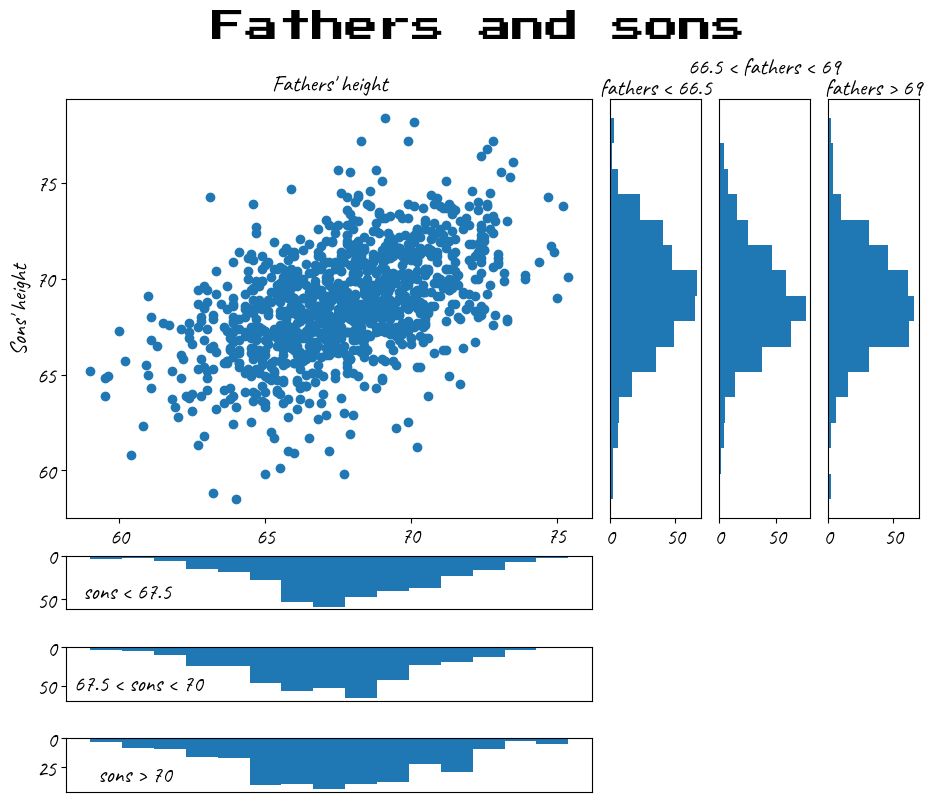

In [20]:
matplotlib.rcParams['figure.figsize'] = (11, 9)
matplotlib.rcParams['font.size'] = 16


general_ax = plt.subplot(grid[0:5, 0:5])
general_ax.scatter(df['Father'], df['Son'])
general_ax.set_xticks([60, 65, 70, 75])
general_ax.set_yticks([60, 65, 70, 75])
general_ax.set_title("Fathers' height", fontsize = 16)
general_ax.set_ylabel("Sons' height")


y1_ax = plt.subplot(grid[0:5, 5])
y1_ax.hist(y1, bins=15, orientation='horizontal')
y1_ax.text(0.5, 1, 'fathers < 66.5',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=y1_ax.transAxes)
y1_ax.set_yticks([]) 
y2_ax = plt.subplot(grid[0:5, 6])
y2_ax.hist(y2, bins=15, orientation='horizontal') 
y2_ax.text(0.5, 1.05, '66.5 < fathers < 69',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=y2_ax.transAxes)
y2_ax.set_yticks([]) 
y3_ax = plt.subplot(grid[0:5, 7])
y3_ax.hist(y3, bins=15, orientation='horizontal') 
y3_ax.text(0.5, 1.0, 'fathers > 69',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=y3_ax.transAxes)
y3_ax.set_yticks([]) 


x1_ax = plt.subplot(grid[5, 0:5])
x1_ax.hist(x1, bins=15)
x1_ax.invert_yaxis()
x1_ax.text(0.2, 0.1, 'sons < 67.5',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=x1_ax.transAxes)
x1_ax.set_xticks([]) 
x2_ax = plt.subplot(grid[6, 0:5])
x2_ax.hist(x2, bins=15)
x2_ax.text(0.26, 0.1, '67.5 < sons < 70',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=x2_ax.transAxes)
x2_ax.invert_yaxis()
x2_ax.set_xticks([]) 
x3_ax = plt.subplot(grid[7, 0:5])
x3_ax.hist(x3, bins=15)
x3_ax.invert_yaxis()
x3_ax.text(0.2, 0.1, 'sons > 70',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=x3_ax.transAxes)
x3_ax.set_xticks([]) 

figure = plt.gcf()
figure.suptitle('Fathers and sons', fontsize=24, fontproperties=prop_Press)
plt.show()
figure.savefig("Fathers&Sons.png", dpi=500, facecolor = 'white')